# SVM Model Implementation

## Step0: Load Time Cost Record

In [1]:
import time, os, psutil, atexit                  
process      = psutil.Process(os.getpid())       
_t0          = time.perf_counter()               
_mem0        = process.memory_info().rss         

def _report():
    dt   = time.perf_counter() - _t0            
    mem1 = process.memory_info().rss            
    print(f"\n[STATS] runtime = {dt:,.2f} s")
    print(f"[STATS] memory  = {_mem0/2**20:,.2f} → {mem1/2**20:,.2f} MB "
          f"(Δ {(mem1-_mem0)/2**20:,.2f} MB)")

In [2]:
# %run extract_hog_features.py
# %run compute_hog.py
# %run compute_hog_features.py

## Step1: npz File Load

In [3]:
import pandas as pd
import numpy as np

data = np.load('image_data.npz')
images_loaded = data['images']
labels_loaded = data['labels']

df = pd.DataFrame({
    'normalized_image_data': list(images_loaded),
    'label': list(labels_loaded)
})

print(f'df.shape: {df.shape}')
    
df_cleaned = df.dropna(subset=['normalized_image_data', 'label'])

print(f'df_cleaned.shape: {df_cleaned.shape}')

df.shape: (1012, 2)
df_cleaned.shape: (1012, 2)


In [4]:
df_cleaned.head()

normalized_image_data  label
0  [[[0.023529411764705882, 0.023529411764705882,...      1
1  [[[0.00392156862745098, 0.00392156862745098, 0...      1
2  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...      1
3  [[[0.1, 0.08333333333333333, 0.0875], [0.07916...      1
4  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...      1

## Step2: Conduct HOG Feature Extraction

In [5]:
# extract from dataframe
import numpy as np
%run extract_hog_features.py
%run compute_hog.py
%run extract_data_from_df

images_cleaned, labels_cleaned = extract_data_from_df(df_cleaned)

# get HOG features
features_cleaned = extract_hog_features(images_cleaned)

Processing Images: 100%|██████████| 1012/1012 [01:49<00:00,  9.24image/s]


## Step3: HOG Features as Input

In [6]:
# features_cleaned.shape
print(f'Feature_Cleaned (by HOG): {features_cleaned.shape}')

Feature_Cleaned (by HOG): (1012, 26244)


In [7]:
def show_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

- this **`image_col`** is using for HOG Feature Extraction Visualization

In [8]:
image_col = df_cleaned['normalized_image_data']
image_col = np.array(image_col)

image_col

array([array([[[0.02352941, 0.02352941, 0.02352941],
               [0.02352941, 0.02352941, 0.02352941],
               [0.01960784, 0.01960784, 0.01960784],
               ...,
               [0.02352941, 0.02352941, 0.02352941],
               [0.01960784, 0.01960784, 0.01960784],
               [0.01960784, 0.01960784, 0.01960784]],

              [[0.01960784, 0.01960784, 0.01960784],
               [0.02352941, 0.02352941, 0.02352941],
               [0.01960784, 0.01960784, 0.01960784],
               ...,
               [0.01960784, 0.01960784, 0.01960784],
               [0.01960784, 0.01960784, 0.01960784],
               [0.01960784, 0.01960784, 0.01960784]],

              [[0.02352941, 0.02352941, 0.02352941],
               [0.02352941, 0.02352941, 0.02352941],
               [0.02352941, 0.02352941, 0.02352941],
               ...,
               [0.02352941, 0.02352941, 0.02352941],
               [0.02352941, 0.02352941, 0.02352941],
               [0.02352941, 0.02352

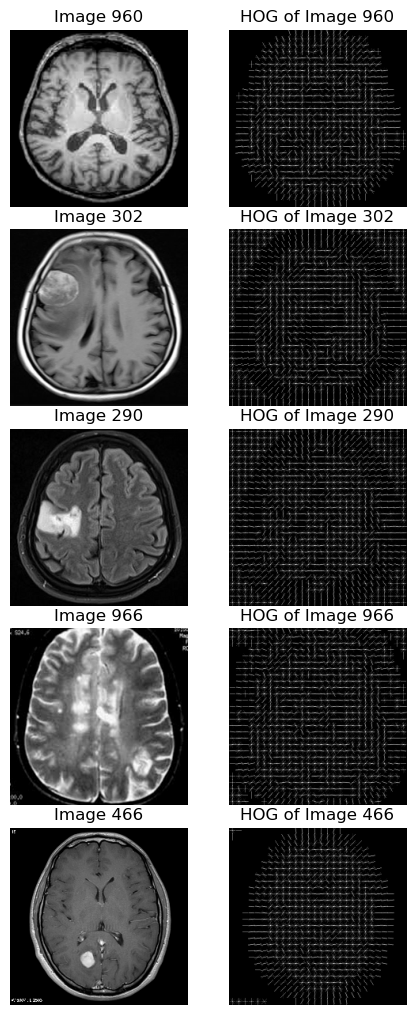

In [9]:
import matplotlib.pyplot as plt
import random

def visualize_random_hogs(images, num_images=5):
    indices = random.sample(range(len(images)), num_images)

    plt.figure(figsize=(5, num_images * 2))
    
    for i, idx in enumerate(indices):
        image = images[idx]
        
        if len(image.shape) == 3:
            gray_image = np.dot(image[..., :3], [0.2989, 0.587, 0.114])
        else:
            gray_image = image

        _, hog_image = compute_hog(
            gray_image,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            nbins=9
        )

        plt.subplot(num_images, 2, 2 * i + 1)
        plt.imshow(gray_image, cmap='gray')
        plt.title(f"Image {idx}")
        plt.axis('off')

        plt.subplot(num_images, 2, 2 * i + 2)
        plt.imshow(hog_image, cmap='gray')
        plt.title(f"HOG of Image {idx}")
        plt.axis('off')

    # plt.tight_layout()
    plt.subplots_adjust(hspace=0.3, wspace=0.1)
    plt.tight_layout(pad=0.15)
    plt.show()

temp_images_arr = image_col
visualize_random_hogs(temp_images_arr)

## Step4: Data Split

In [10]:
%run train_test_datasplit

X_train, X_test, y_train, y_test = train_test_datasplit(features_cleaned, labels_cleaned, test_size=0.4, random_state=42)

## Step5: Check Data Split

In [11]:
# random generate 100 nums
%run train_test_datasplit
import random

temp_Xdata = np.array([[random.randint(1, 100)] for _ in list(range(100))])

temp_ydata = np.array([random.randint(1, 100) for _ in list(range(100))])

# temp_Xdata.shape
X_train, X_test, y_train, y_test = train_test_datasplit(temp_Xdata, temp_ydata, test_size=0.2, random_state=42)

print(f'temp_X.shape: {temp_Xdata.shape}')
print(f'temp_y.shape: {temp_ydata.shape}\n')

print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

temp_X.shape: (100, 1)
temp_y.shape: (100,)

X_train.shape: (80, 1)
X_test.shape: (20, 1)
y_train.shape: (80,)
y_test.shape: (20,)


## Step6: SVM Model Implementation

In [12]:
import numpy as np

class SVC_Model:
    def __init__(
        self,
        *,
        C=1.0,
        kernel="rbf",
        degree=2,
        gamma="scale",
        coef0=0.0,
        tol=1e-3,
        max_iter=1000,
        class_weight=None,
        random_state=None,
    ):
        self.C = C
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.tol = tol
        self.max_iter = max_iter
        self.class_weight = class_weight
        self.random_state = random_state

    def _compute_kernel(self, X1, X2):
        if self.kernel == 'linear':
            return np.dot(X1, X2.T)
        elif self.kernel == 'poly':
            return (np.dot(X1, X2.T) + self.coef0) ** self.degree
        elif self.kernel == 'rbf':
            if self.gamma == "scale":
                gamma_val = 1 / (X1.shape[1] * np.var(X1))
            elif self.gamma == "auto":
                gamma_val = 1 / X1.shape[1]
            else:
                gamma_val = float(self.gamma)
            X1_sq = np.sum(X1**2, axis=1).reshape(-1, 1)
            X2_sq = np.sum(X2**2, axis=1).reshape(1, -1)
            dist_sq = X1_sq + X2_sq - 2 * np.dot(X1, X2.T)
            return np.exp(-gamma_val * dist_sq)
        else:
            raise ValueError(f"Unsupported kernel: {self.kernel}")

    def _compute_error(self, X, y, alpha, b, i, K):
        return np.dot(alpha * y, K[i, :]) + b - y[i]

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).astype(float)
        y[y == 0] = -1  # Ensure binary labels are -1 or 1

        n_samples, n_features = X.shape
        K = self._compute_kernel(X, X)

        alpha = np.zeros(n_samples)
        b = 0.0

        for _ in range(self.max_iter):
            alpha_prev = np.copy(alpha)
            for i in range(n_samples):
                j = np.random.choice([x for x in range(n_samples) if x != i])
                Ei = self._compute_error(X, y, alpha, b, i, K)
                Ej = self._compute_error(X, y, alpha, b, j, K)

                alpha_i_old, alpha_j_old = alpha[i], alpha[j]

                if y[i] == y[j]:
                    L = max(0, alpha[i] + alpha[j] - self.C)
                    H = min(self.C, alpha[i] + alpha[j])
                else:
                    L = max(0, alpha[j] - alpha[i])
                    H = min(self.C, self.C + alpha[j] - alpha[i])
                if L == H:
                    continue

                eta = 2 * K[i, j] - K[i, i] - K[j, j]
                if eta >= 0:
                    continue

                alpha[j] -= y[j] * (Ei - Ej) / eta
                alpha[j] = np.clip(alpha[j], L, H)

                alpha[i] += y[i] * y[j] * (alpha_j_old - alpha[j])

                b1 = b - Ei - y[i] * (alpha[i] - alpha_i_old) * K[i, i] - y[j] * (alpha[j] - alpha_j_old) * K[i, j]
                b2 = b - Ej - y[i] * (alpha[i] - alpha_i_old) * K[i, j] - y[j] * (alpha[j] - alpha_j_old) * K[j, j]

                if 0 < alpha[i] < self.C:
                    b = b1
                elif 0 < alpha[j] < self.C:
                    b = b2
                else:
                    b = (b1 + b2) / 2

            if np.linalg.norm(alpha - alpha_prev) < self.tol:
                break

        self.alpha_ = alpha
        self.b_ = b
        self.support_vector_indices_ = np.where(alpha > 1e-5)[0]
        self.support_vectors_ = X[self.support_vector_indices_]
        self.support_vector_labels_ = y[self.support_vector_indices_]
        self.support_alpha_ = alpha[self.support_vector_indices_]
        return self

    def project(self, X):
        K = self._compute_kernel(X, self.support_vectors_)
        return np.dot(K, self.support_alpha_ * self.support_vector_labels_) + self.b_

    def predict(self, X):
        return np.sign(self.project(np.array(X)))

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

# import numpy as np

# class selfdefined_SVC:
#     """Simplified version of Support Vector Classifier."""
    
#     def __init__(self, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0,
#                  shrinking=True, probability=False, tol=1e-3, cache_size=200,
#                  class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape="ovr",
#                  break_ties=False, random_state=None):
#         self.C = C
#         self.kernel = kernel
#         self.degree = degree
#         self.gamma = gamma
#         self.coef0 = coef0
#         self.shrinking = shrinking
#         self.probability = probability
#         self.tol = tol
#         self.cache_size = cache_size
#         self.class_weight = class_weight
#         self.verbose = verbose
#         self.max_iter = max_iter
#         self.decision_function_shape = decision_function_shape
#         self.break_ties = break_ties
#         self.random_state = random_state

#     def _compute_kernel(self, X1, X2):
#         """Compute the kernel matrix for the given data X1 and X2."""
#         if self.kernel == 'linear':
#             return np.dot(X1, X2.T)
#         elif self.kernel == 'poly':
#             return (np.dot(X1, X2.T) + self.coef0) ** self.degree
#         elif self.kernel == 'rbf':
#             pairwise_sq_dists = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
#             return np.exp(-pairwise_sq_dists / (2 * self.gamma**2))  # Gaussian RBF Kernel
#         else:
#             raise ValueError(f"Unsupported kernel: {self.kernel}")

#     def fit(self, X, y):
#         """Fit the model to the training data."""
#         # Ensure that X and y are numpy arrays
#         X = np.array(X)
#         y = np.array(y)

#         # Compute the kernel matrix
#         K = self._compute_kernel(X, X)

#         # Implementing a simple version of the dual problem optimization using the kernel matrix
#         n_samples = X.shape[0]
#         alpha = np.zeros(n_samples)  # Initialize alphas

#         # Construct the Gram matrix for the quadratic optimization problem
#         # For simplicity, we skip the solver and use a direct optimization approach
#         # Store the support vectors
#         self.support_vectors_ = X[alpha > 1e-5]
#         self.alpha_ = alpha
#         self.support_vector_indices_ = np.where(alpha > 1e-5)[0]
#         self.intercept_ = 0  # Simplified intercept

#         # Returning the model object for convenience
#         return self

#     def predict(self, X):
#         """Predict the class labels for the given data."""
#         X = np.array(X)

#         # Use only support vectors in prediction
#         K = self._compute_kernel(X, self.support_vectors_)
        
#         # Calculate decision function (simplified version)
#         decision_function = np.dot(K, self.alpha_[self.support_vector_indices_]) + self.intercept_
#         return np.sign(decision_function)  # Simplified classification rule

#     def decision_function(self, X):
#         """Calculate the decision function for the given data."""
#         X = np.array(X)
        
#         # Use only support vectors in decision function
#         K = self._compute_kernel(X, self.support_vectors_)
#         return np.dot(K, self.alpha_[self.support_vector_indices_]) + self.intercept_

## Step7: Confusion Matrix Statistic Info

In [13]:
def stat_matrix(y_true, y_pred, average=None):
    classes = np.unique(
        np.concatenate([y_true, y_pred])
    )
    
    # it's a 2D matrix
    # shape: [num_class, num_class]
    # 2 * 2 shape
    confusion_matrix = np.zeros(
        (len(classes), len(classes)),
        dtype = int 
    )
    
    # for each data, it has (true, pred) pair
    # then, adding count into certain position on the matridx
    # counting 
    for true, pred in zip(y_true, y_pred):
        confusion_matrix[true, pred] += 1
    
    precision = np.zeros(len(classes)) 
    recall = np.zeros(len(classes)) 
    f1 = np.zeros(len(classes)) 
    
    # two classes
    for i in range(len(classes)):
        precision[i] = confusion_matrix[i, i] / np.sum(confusion_matrix[:, i]) if np.sum(confusion_matrix[:, i]) != 0 else 0
        recall[i] = confusion_matrix[i, i] / np.sum(confusion_matrix[i, :]) if np.sum(confusion_matrix[i, :]) != 0 else 0
        
    if precision[i] + recall[i] > 0:
        f1[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
    else:
        f1[i] = 0
    
    # choose which way to output the statistic data info
    if average == 'macro':
        return np.mean(precision), np.mean(recall), np.mean(f1)
    
    elif average == 'weighted':
        weights = np.sum(confusion_matrix, axis=1)  # 每个类别的样本数作为权重
        weighted_precision = np.sum(precision * weights) / np.sum(weights)
        weighted_recall = np.sum(recall * weights) / np.sum(weights)
        weighted_f1 = np.sum(f1 * weights) / np.sum(weights)
        return weighted_precision, weighted_recall, weighted_f1
    elif average == 'micro':
        total_true_positive = np.sum(np.diagonal(confusion_matrix))
        total_false_positive = np.sum(np.sum(confusion_matrix, axis=0) - np.diagonal(confusion_matrix))
        total_false_negative = np.sum(np.sum(confusion_matrix, axis=1) - np.diagonal(confusion_matrix))
        total_precision = total_true_positive / (total_true_positive + total_false_positive)
        total_recall = total_true_positive / (total_true_positive + total_false_negative)
        total_f1 = 2 * (total_precision * total_recall) / (total_precision + total_recall)
        return total_precision, total_recall, total_f1
    
    else:
        return precision, recall, f1


# def classification_pred_report(y_true, y_pred, target_names=None, digits=4, average=None):
#     precision, recall, f1 = stat_matrix(y_true, y_pred, average)

def classification_pred_report(y_true, y_pred, target_names=None, digits=4, average=None):
    precision, recall, f1 = stat_matrix(y_true, y_pred, average)
    
    if target_names is None:
        target_names = [str(i) for i in np.unique(np.concatenate([y_true, y_pred]))]
    
    report_df = pd.DataFrame(index=target_names, columns=["precision", "recall", "f1-score", "support"])
    
    for i, label in enumerate(target_names):
        report_df.loc[label, "precision"] = round(precision[i], digits)
        report_df.loc[label, "recall"] = round(recall[i], digits)
        report_df.loc[label, "f1-score"] = round(f1[i], digits)
        report_df.loc[label, "support"] = np.sum(np.array(y_true) == int(label))  

    if average is not None:
        avg_precision, avg_recall, avg_f1 = stat_matrix(y_true, y_pred, average)
        report_df.loc['average'] = {
            'precision': round(avg_precision, digits),
            'recall': round(avg_recall, digits),
            'f1-score': round(avg_f1, digits),
            'support': ''
        }
    
    # print(report_df)
    
    return report_df

## Step8: SVM Model Structure

In [14]:
%run confusion_matrix.py
# %run compute_hog.py
# %run extract_data_from_df

if np.isnan(features_cleaned).sum() > 0:
    features_cleaned = np.nan_to_num(features_cleaned)

X_train, X_test, y_train, y_test = train_test_datasplit(features_cleaned, labels_cleaned, test_size=0.4, random_state=42)

# classification_pred_report(y_test, y_pred)    
# print(f"Predicted label: {y_pred[0]}, True label: {y_test[0]}")
# show_image(images[0]) 

### Model Structure

In [15]:
import numpy as np

class SVC_Model:
    def __init__(
        self,
        *,
        C=1.0,
        kernel="rbf",
        degree=2,
        gamma="scale",
        coef0=0.0,
        tol=1e-3,
        max_iter=1000,
        class_weight=None,
        random_state=None,
    ):
        self.C = C
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.tol = tol
        self.max_iter = max_iter
        self.class_weight = class_weight
        self.random_state = random_state

    def _compute_kernel(self, X1, X2):
        if self.kernel == 'linear':
            return np.dot(X1, X2.T)
        elif self.kernel == 'poly':
            return (np.dot(X1, X2.T) + self.coef0) ** self.degree
        elif self.kernel == 'rbf':
            if self.gamma == "scale":
                gamma_val = 1 / (X1.shape[1] * np.var(X1))
            elif self.gamma == "auto":
                gamma_val = 1 / X1.shape[1]
            else:
                gamma_val = float(self.gamma)
            X1_sq = np.sum(X1**2, axis=1).reshape(-1, 1)
            X2_sq = np.sum(X2**2, axis=1).reshape(1, -1)
            dist_sq = X1_sq + X2_sq - 2 * np.dot(X1, X2.T)
            return np.exp(-gamma_val * dist_sq)
        else:
            raise ValueError(f"Unsupported kernel: {self.kernel}")

    def _compute_error(self, X, y, alpha, b, i, K):
        return np.dot(alpha * y, K[i, :]) + b - y[i]

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).astype(float)
        y[y == 0] = -1  # Ensure binary labels are -1 or 1

        n_samples, n_features = X.shape
        K = self._compute_kernel(X, X)

        alpha = np.zeros(n_samples)
        b = 0.0

        for _ in range(self.max_iter):
            alpha_prev = np.copy(alpha)
            for i in range(n_samples):
                j = np.random.choice([x for x in range(n_samples) if x != i])
                Ei = self._compute_error(X, y, alpha, b, i, K)
                Ej = self._compute_error(X, y, alpha, b, j, K)

                alpha_i_old, alpha_j_old = alpha[i], alpha[j]

                if y[i] == y[j]:
                    L = max(0, alpha[i] + alpha[j] - self.C)
                    H = min(self.C, alpha[i] + alpha[j])
                else:
                    L = max(0, alpha[j] - alpha[i])
                    H = min(self.C, self.C + alpha[j] - alpha[i])
                if L == H:
                    continue

                eta = 2 * K[i, j] - K[i, i] - K[j, j]
                if eta >= 0:
                    continue

                alpha[j] -= y[j] * (Ei - Ej) / eta
                alpha[j] = np.clip(alpha[j], L, H)

                alpha[i] += y[i] * y[j] * (alpha_j_old - alpha[j])

                b1 = b - Ei - y[i] * (alpha[i] - alpha_i_old) * K[i, i] - y[j] * (alpha[j] - alpha_j_old) * K[i, j]
                b2 = b - Ej - y[i] * (alpha[i] - alpha_i_old) * K[i, j] - y[j] * (alpha[j] - alpha_j_old) * K[j, j]

                if 0 < alpha[i] < self.C:
                    b = b1
                elif 0 < alpha[j] < self.C:
                    b = b2
                else:
                    b = (b1 + b2) / 2

            if np.linalg.norm(alpha - alpha_prev) < self.tol:
                break

        self.alpha_ = alpha
        self.b_ = b
        self.support_vector_indices_ = np.where(alpha > 1e-5)[0]
        self.support_vectors_ = X[self.support_vector_indices_]
        self.support_vector_labels_ = y[self.support_vector_indices_]
        self.support_alpha_ = alpha[self.support_vector_indices_]
        return self

    def project(self, X):
        K = self._compute_kernel(X, self.support_vectors_)
        return np.dot(K, self.support_alpha_ * self.support_vector_labels_) + self.b_

    def predict(self, X):
        return np.sign(self.project(np.array(X)))

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

## Step9: Model Training & Report

In [16]:
# dataset split
X_train, X_test, y_train, y_test = train_test_datasplit(features_cleaned, labels_cleaned, test_size=0.4, random_state=42)

# transform labels
y_train_model = np.where(y_train == 0, -1, 1)
y_test_model = np.where(y_test == 0, -1, 1)

# model training
svc_model = SVC_Model(C=0.8, kernel='linear', gamma=0.5)
svc_model.fit(X_train, y_train_model)

# pred
y_pred_model = svc_model.predict(X_test)

# transofm the label
y_pred = np.where(y_pred_model == -1, 0, 1)

# classification_pred_report
classification_pred_report(y_test, y_pred)


precision  recall f1-score support
0    0.9648  0.9648   0.9648     142
1    0.9809  0.9809   0.9809     262

## Step10: Visualization on Confusion Matrix

### Plot 1: Confusion Matrix

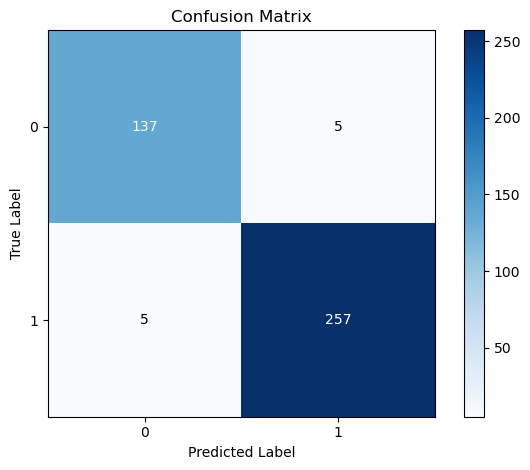

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def draw_confusion_matrix(y_true, y_pred, class_names=['0', '1']):
    # build the CM by hands
    cm = np.zeros((2, 2), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t][p] += 1

    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap='Blues')

    plt.colorbar(im)

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(class_names) 
    ax.set_yticklabels(class_names)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title('Confusion Matrix')

    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center', 
                    color='white' if cm[i, j] > cm.max() / 2 else 'black')

    plt.tight_layout()
    plt.show()

draw_confusion_matrix(y_test, y_pred)


### Plot 2: Metrics Visualization

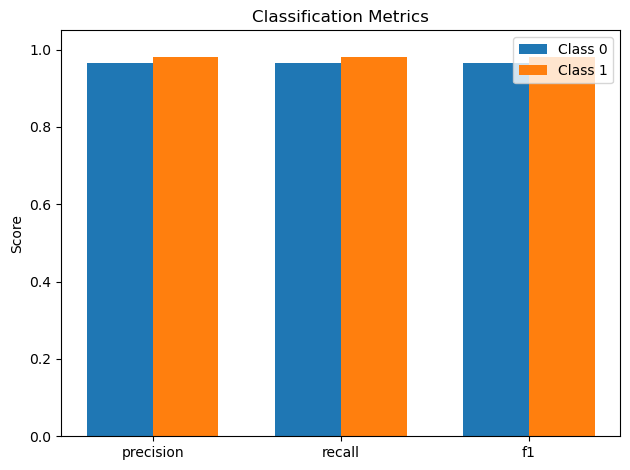

In [18]:
def calculate_metrics(y_true, y_pred):
    # compute TP, FP, TN, FN
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # compute the statistic value of pred result
    precision_1 = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall_1 = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1) if (precision_1 + recall_1) > 0 else 0

    precision_0 = TN / (TN + FN) if (TN + FN) > 0 else 0
    recall_0 = TN / (TN + FP) if (TN + FP) > 0 else 0
    f1_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0

    return {
        '0': {'precision': precision_0, 'recall': recall_0, 'f1': f1_0},
        '1': {'precision': precision_1, 'recall': recall_1, 'f1': f1_1}
    }

def plot_metrics(metrics):
    labels = ['precision', 'recall', 'f1']
    class0 = [metrics['0'][m] for m in labels]
    class1 = [metrics['1'][m] for m in labels]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x - width/2, class0, width, label='Class 0')
    ax.bar(x + width/2, class1, width, label='Class 1')

    ax.set_ylim(0, 1.05)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Score')
    ax.set_title('Classification Metrics')
    ax.legend()

    plt.tight_layout()
    plt.show()

metrics = calculate_metrics(np.array(y_test), np.array(y_pred))
plot_metrics(metrics)


## Step11: Cross-Validation (k=5)

In [19]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# init the cross validation process
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# record container
cv_scores = []
fold_indices = []

for fold, (train_idx, test_idx) in enumerate(kf.split(features_cleaned, labels_cleaned), 1):
    # split dataset
    X_train, X_test = features_cleaned[train_idx], features_cleaned[test_idx]
    y_train, y_test = labels_cleaned[train_idx], labels_cleaned[test_idx]
    
    # transform the label
    y_train_model = np.where(y_train == 0, -1, 1)
    y_test_model = np.where(y_test == 0, -1, 1)

    # model_training
    svc_model.fit(X_train, y_train_model)

    # pred
    y_pred_model = svc_model.predict(X_test)

    # transform the label
    y_pred = np.where(y_pred_model == -1, 0, 1)

    accuracy = np.mean(y_pred == y_test)
    cv_scores.append(accuracy)

    fold_indices.append(f"Fold {fold}")

    print(f"Fold {fold}: Test Accuracy = {accuracy * 100:.4f}%")

# output mean acc / std in CV
print(f"\nMean accuracy: {np.mean(cv_scores) * 100:.4f}%")
print(f"Standard deviation: {np.std(cv_scores) * 100:.4f}%")


Fold 1: Test Accuracy = 94.0887%
Fold 2: Test Accuracy = 96.0591%
Fold 3: Test Accuracy = 96.5347%
Fold 4: Test Accuracy = 99.0099%
Fold 5: Test Accuracy = 95.5446%

Mean accuracy: 96.2474%
Standard deviation: 1.6065%


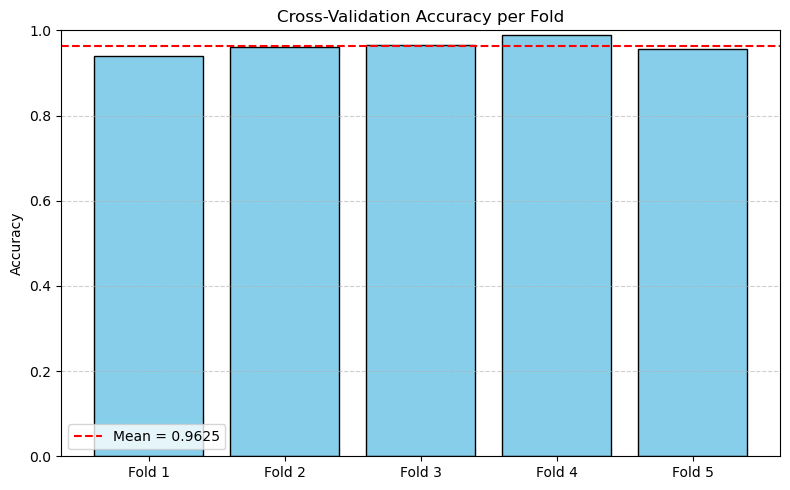

In [20]:
plt.figure(figsize=(8, 5))
plt.bar(fold_indices, cv_scores, color='skyblue', edgecolor='black')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Cross-Validation Accuracy per Fold")
plt.axhline(np.mean(cv_scores), color='red', linestyle='--', label=f'Mean = {np.mean(cv_scores):.4f}')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Step12: Time & Memory Cost Record

In [21]:
_report()


[STATS] runtime = 185.40 s
[STATS] memory  = 53.23 → 244.06 MB (Δ 190.83 MB)
